In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [23]:
def check_on_boundries(colour, dim, bin_size):
    for i in range(dim):
        if bin_size * i <= colour < bin_size * (i+1):
            return i

In [26]:
def count_gch(img, width, height, dim, bin_size):
    #Размерность: red, blue, green
    hist = np.zeros((dim, dim, dim)).astype(int)
    
    for x in range(width):
        for y in range(height):
            colour = img[x,y]
            red_bin = check_on_boundries(int(colour[0]), dim, bin_size)
            green_bin = check_on_boundries(int(colour[1]), dim, bin_size)
            blue_bin = check_on_boundries(int(colour[2]), dim, bin_size)                
            hist[red_bin][green_bin][blue_bin] += 1
    
    return hist

In [27]:
def show_image(img, title, cmap = "gray"):
    plt.imshow(img, cmap)
    plt.title(title)
    plt.show()

In [62]:
def main():
    dim = int(input("Enter dimension:"))
    
    img = cv2.imread("img.jpg")
        
    CHANNEL_MAX = 256
    CHANNELS = 3
    BIN_SIZE = CHANNEL_MAX / dim
    WIDTH = img.shape[0]
    HEIGTH = img.shape[1]
    BLUR_KERNEL = 11
    CONTOUR_COLOUR = (150, 150, 150)
    CONTOUR_THICKNESS = 2
    KERNEL_SIZE = 9
    THRESH = 20
    T_LOWER = 30
    T_UPPER = 200
    ALL_EDGES = -1

    #Применяем размытие
    blured = cv2.blur(img,(BLUR_KERNEL, BLUR_KERNEL))
    
    #Фильтр черно-белого
    gray = cv2.cvtColor(blured, cv2.COLOR_BGR2GRAY)

    #Пороговая бинаризация
    threshold, binarized = cv2.threshold(gray, THRESH, CHANNEL_MAX - 1, cv2.THRESH_BINARY)
    
    #Нахождение контуров
    contours = cv2.Canny(binarized, T_LOWER, T_UPPER)
    edges, hierarchy = cv2.findContours(contours, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    #Отрисовываем контуры на пустом изображении
    empty = np.zeros((WIDTH, HEIGTH, CHANNELS), dtype=np.uint8)
    masked = cv2.drawContours(empty, edges, ALL_EDGES, CONTOUR_COLOUR, CONTOUR_THICKNESS)

    show_image(img, 'Original', None)
    show_image(blured, 'Blurred', None)
    show_image(gray, 'Black And White')
    show_image(binarized, 'Binarized Threshold')
    show_image(masked, 'Masked')

    #Вычисляем две гистограммы
    print("Histogram is counting...\n")
    print(f'Original hist:\n'
          f'{count_gch(img, WIDTH, HEIGTH, dim, BIN_SIZE)}\n\n')
    
    print("Histogram is counting...\n")      
    print(f'Masked hist:\n'
          f'{count_gch(masked, WIDTH, HEIGTH, dim, BIN_SIZE)}')

Enter dimension: 6


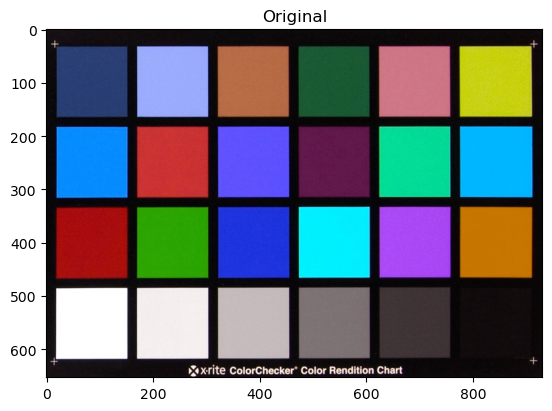

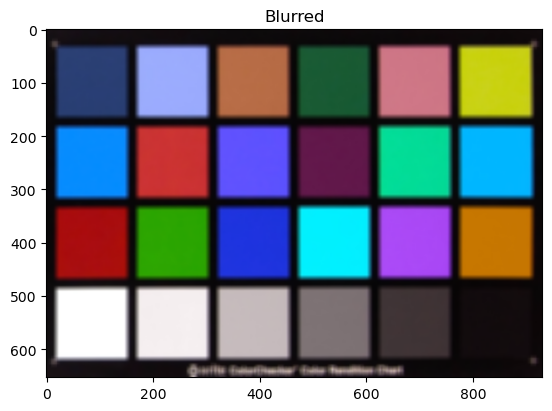

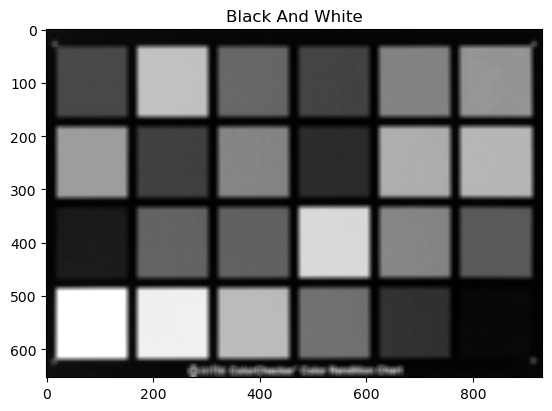

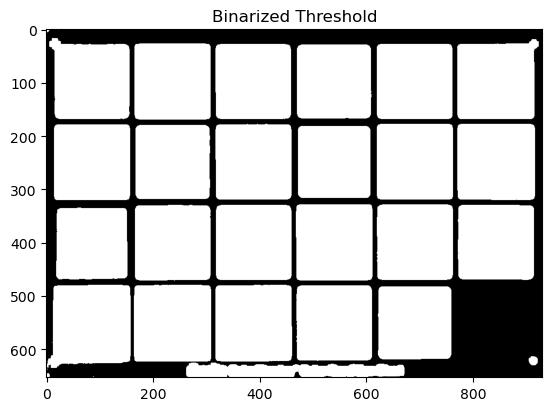

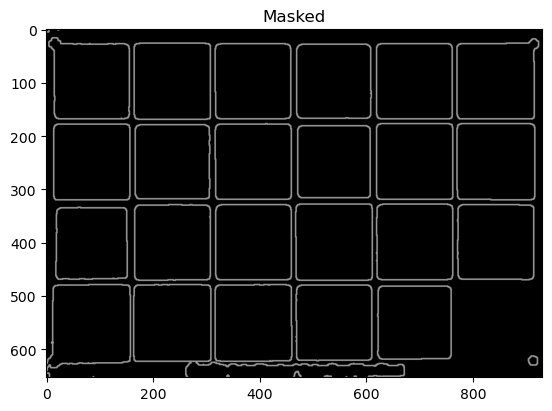

Histogram is counting...

Original hist:
[[[184764   3436    695    374      3      0]
  [   729   1423  11044    373    622  16469]
  [   200  16653    203    164    158     50]
  [  4955     27     55    105    136  17041]
  [     0      0      0    301     17  17496]
  [     0      0      0  16526     59  16907]]

 [[  3405   1352    260    189      0      0]
  [   433  17898   6642    286    445     29]
  [   165      4      1     19     71     72]
  [ 12422      1      1     61     89    452]
  [    13      0     23    373     65     92]
  [     0      0      0     87     49    427]]

 [[   867  16789      7     16      0      0]
  [   569    782    315     29     21  16591]
  [   220    251  16848    119     45    648]
  [    14      0      0      3    169      0]
  [     0      0      1      2      1      0]
  [     0      0      0      1      0      7]]

 [[ 13023     58      0      0      0      0]
  [    62    178     73     77    308  10734]
  [   256    579   1303    120   

In [63]:
if __name__ == "__main__":
    main()